# Psalms VS CCLI: Comparing Repetitiveness

In [248]:
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
def load_json(file_path):
    """Load JSON file and extract all words from tokenized sentences."""
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    words = []
    for sentence in data.get("sentence", []):  # Iterate through each sentence
        for token in sentence.get("token", []):  # Extract tokens
            if "word" in token:
                words.append(token["word"])
    
    return words

In [250]:
# Testing on Psalms 1
psalms1_file_path = "Output Files Pipeline5/Output Files Pipeline5/Psalm Files 2/Psalm 1_5.json"
psalms1_word_list = load_json(psalms1_file_path)

print(f"Total words in file: {len(psalms1_word_list)}")
print(f"Sample words: {psalms1_word_list[:10]}")


Total words in file: 139
Sample words: ['Blessed', 'is', 'the', 'man', 'who', 'walks', 'not', 'in', 'the', 'counsel']


# Loading and Formatting Psalms
Removing Puncuation and making common words lower case

In [251]:
# Loading all Psalms
all_psalms_file_path = "Output Files Pipeline5/Output Files Pipeline5/Concatenated Files 2/All Psalms_5.json"
all_psalms_word_list = load_json(all_psalms_file_path)

print(f"Total words in Psalms: {len(all_psalms_word_list)}")

Total words in Psalms: 48081


In [252]:
# Lower case all words except for the ones that need to be kept uppercase
keep_uppercase_words = ["LORD", "God", "He", "Lord", "Jesus", "Christ", "I"]
all_psalms_word_list = [word.lower() if word not in keep_uppercase_words
                        else word for word in all_psalms_word_list ]

In [253]:
# Remove unwanted puncuation
unwanted_puncuation = [",", ".", "!", "?", ";", ":", "\'", "\""]
all_psalms_word_list1 = [word for word in all_psalms_word_list if word not in unwanted_puncuation]
print(f"Total words in Psalms after removing unwanted puncuation: {len(all_psalms_word_list1)}")


Total words in Psalms after removing unwanted puncuation: 41394


In [254]:
#Top 10 words in Psalms
psalms_freq1 = Counter(all_psalms_word_list1)

# Print the 10 most common words
print("Top 10 words in Psalms:", psalms_freq1.most_common(10))


Top 10 words in Psalms: [('the', 2776), ('and', 1314), ('of', 1257), ('my', 924), ('to', 917), ('your', 895), ('you', 882), ('in', 820), ('I', 786), ('LORD', 730)]


# Loading and Formatting Songs
Removing puncuation and making common words lowercase

In [255]:
# Loading all songs
all_songs_file_path = "Output Files Pipeline5/Output Files Pipeline5/Concatenated Files 2/All Songs_5.json"
all_songs_word_list = load_json(all_songs_file_path)
print(f"Total words in file: {len(all_songs_word_list)}")

Total words in file: 15411


In [256]:
# Formatting words
all_songs_word_list = [word.lower() if word not in keep_uppercase_words
                        else word for word in all_songs_word_list ]

In [257]:
# Removing Puncuation

all_songs_word_list1 = [word for word in all_songs_word_list if word not in unwanted_puncuation]
print(f"Total words without puncuation: {len(all_songs_word_list1)}")

Total words without puncuation: 15403


# Removing Stop words

## Plotting Psalms without Stop Words

In [258]:
# Defining Stop Words
articles = ["a", "an", "the"]
conjunctions = ["and", "but", "or", "nor"]
prepositions = ["at", "by", "for", "from", "in", "of"]
verbs = ["is", "was", "were", "are", "be", "been", "being", "have", "has", "had", "do", "does", "did"]
other = ["that", "this", "there", "here", "\'m", "\'s", "o", "n\'t", "\'re", "\'ve", "\'d", "ll", "ve", "re", "’s"]

stop_words = articles + conjunctions + prepositions + verbs + other + unwanted_puncuation

all_psalms_word_list2 = [word for word in all_psalms_word_list if word not in stop_words]

print(f"Total words in Psalms after removing stop words: {len(all_psalms_word_list2)}")


Total words in Psalms after removing stop words: 30489


In [259]:
#Top 10 words in Psalms without unwanted words
psalms_freq2 = Counter(all_psalms_word_list2)

print("Top 10 words in Psalms after stop words: ", psalms_freq2.most_common(20))

Top 10 words in Psalms after stop words:  [('my', 924), ('to', 917), ('your', 895), ('you', 882), ('I', 786), ('LORD', 730), ('me', 660), ('his', 593), ('who', 435), ('will', 434), ('God', 426), ('they', 399), ('he', 389), ('not', 385), ('with', 354), ('all', 333), ('them', 301), ('their', 296), ('him', 255), ('let', 238)]


In [293]:
# Function to Plot Word Frequencies
def plot_word_frequencies(word_freq, title, top_n=10):
    """Plots a bar chart of the top N most frequent words."""
    common_words = word_freq.most_common(top_n)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(words), y=list(counts), palette="viridis")
    plt.xticks(rotation=45, fontsize=15)
    plt.xlabel("Words", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.title(title, fontsize=20)
    plt.show()

C:\Users\natec\AppData\Local\Temp\ipykernel_14472\1780045103.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


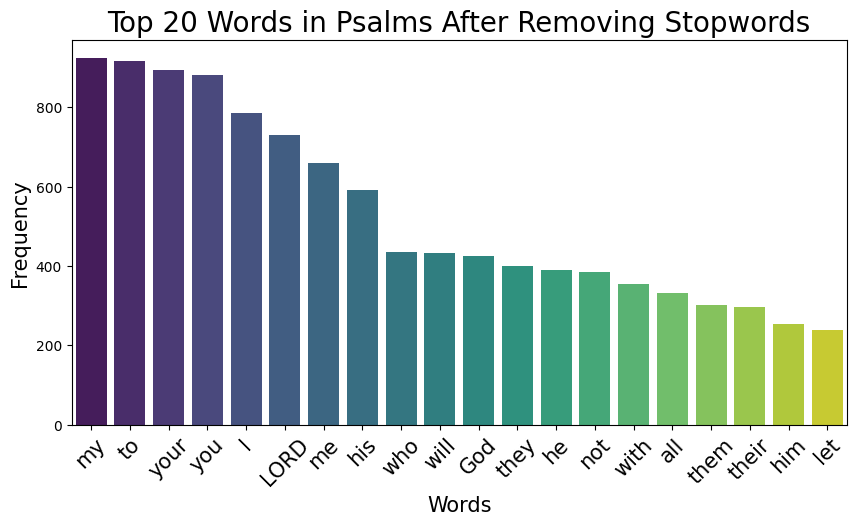

In [294]:
plot_word_frequencies(psalms_freq2, "Top 20 Words in Psalms After Removing Stopwords", top_n=20)

## Plotting Songs without Stop Words

In [295]:
# Removing Stop Words From Songs
all_songs_word_list2 = [word for word in all_songs_word_list if word not in stop_words]
print(f"Total words in file after removing stop words: {len(all_songs_word_list2)}")


Total words in file after removing stop words: 11824


In [296]:
songs_freq2 = Counter(all_songs_word_list2)

print("Top 10 words in Christian songs after removing common word:s", songs_freq2.most_common(20))

Top 10 words in Christian songs after removing common word:s [('I', 660), ('you', 530), ('my', 369), ('to', 265), ('your', 214), ('me', 202), ('all', 178), ('He', 163), ('God', 160), ('it', 146), ('Jesus', 140), ('praise', 126), ('Lord', 110), ('name', 101), ('who', 99), ('will', 98), ('holy', 95), ('oh', 94), ('on', 91), ('we', 91)]


C:\Users\natec\AppData\Local\Temp\ipykernel_14472\1780045103.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


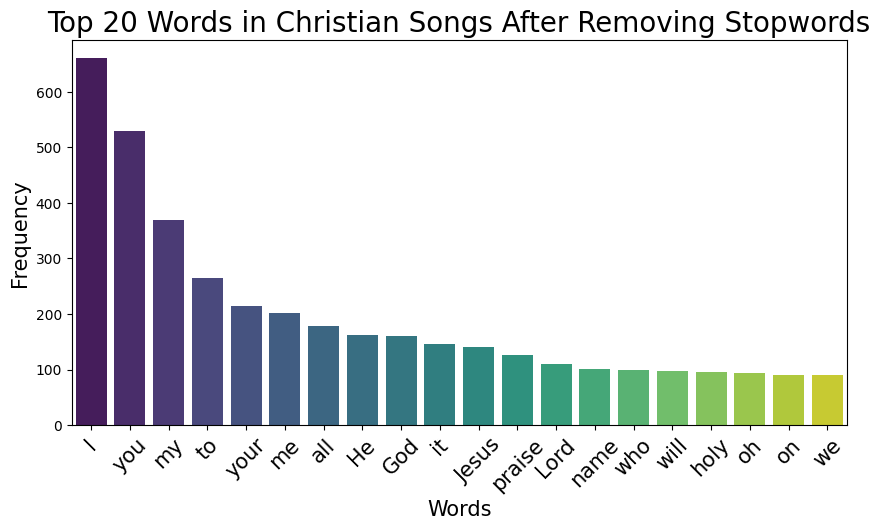

In [297]:
plot_word_frequencies(songs_freq2, "Top 20 Words in Christian Songs After Removing Stopwords", top_n = 20)

## Analysis


# Removing Low Impact Words

In [298]:
common_function_words = [
    "a", "an", "and", "the", "or", "but", "if", "then", "so", "yet",
    "to", "for", "of", "with", "at", "by", "from", "on", "in", "as",
    "that", "this", "these", "those", "which", "who", "whom", "whose",
    "what", "where", "when", "why", "how", "there", "here", "all",
    "any", "some", "such", "each", "other", "another", "many", "several",
    "more", "most", "much", "few", "less", "none", "both"
]
pronouns = [
   "I", "me", "my", "mine", "myself",
    "you", "your", "yours", "yourself", "yourselves",
   "he", "him", "his", "himself",
   "she", "her", "hers", "herself",
   "it", "its", "itself",
    "we", "us", "our", "ours", "ourselves",
    "they", "them", "their", "theirs", "themselves"
]
auxiliary_verbs = [
    "is", "am", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having",
    "do", "does", "did", "doing",
    "will", "shall", "would", "should", "can", "could", "may", "might", "must", "re", "\'ll"
]
low_value_psalms_words = [
    "not", "let", "who", "all", "them", "their", "him", "shall", "oh", "no"
]
God_words = ["God", "Jesus", "Christ", "Lord", "He", "Him", "His", "LORD"]

low_impact_words = stop_words + common_function_words + auxiliary_verbs + low_value_psalms_words + pronouns + God_words



## Plotting Psalms After Removing Low Impact Words

C:\Users\natec\AppData\Local\Temp\ipykernel_14472\1780045103.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


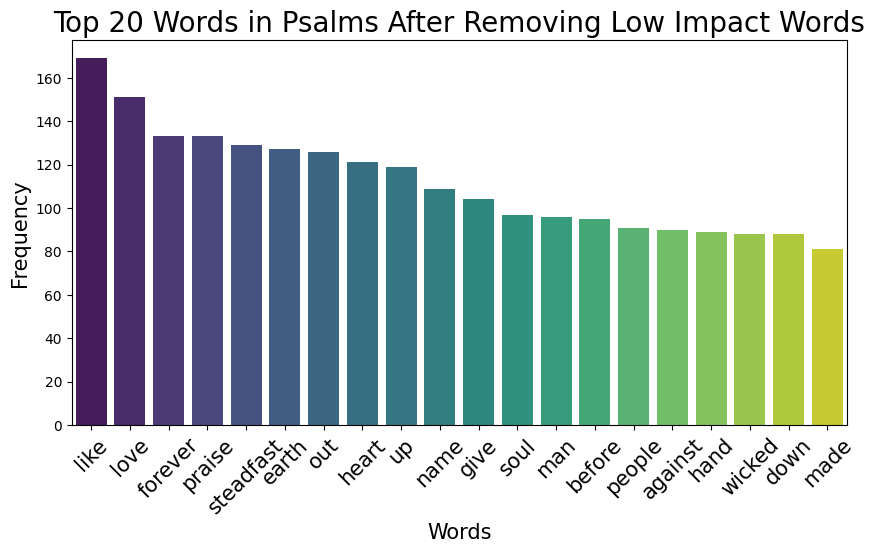

In [299]:
all_psalms_word_list3 = [word for word in all_psalms_word_list if word not in low_impact_words]
plot_word_frequencies(Counter(all_psalms_word_list3), "Top 20 Words in Psalms After Removing Low Impact Words", top_n=20)

In [300]:
print(f"Total words in Psalms after removing low impact words: {len(all_psalms_word_list3)}")

Total words in Psalms after removing low impact words: 17161


## Plotting Songs after Removing Low Impact Words

C:\Users\natec\AppData\Local\Temp\ipykernel_14472\1780045103.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


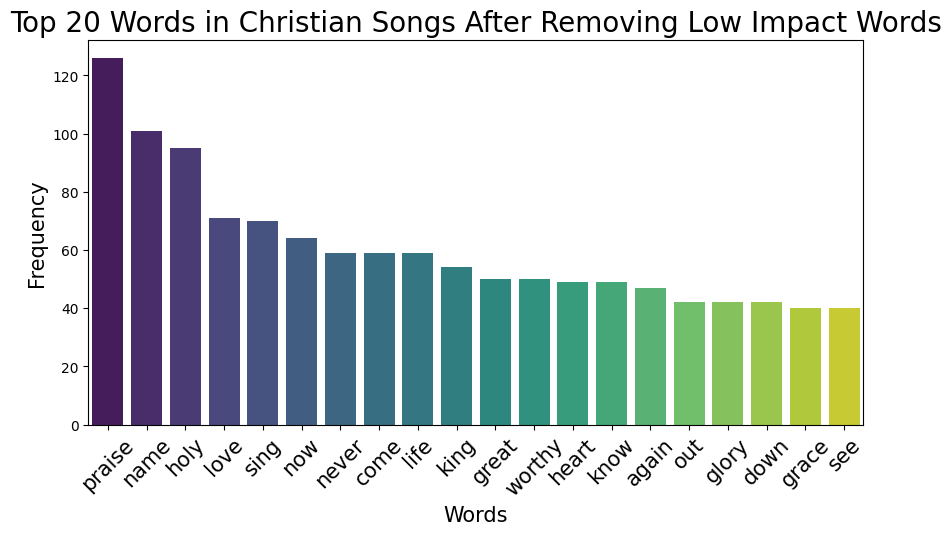

In [301]:
all_songs_word_list3 = [word for word in all_songs_word_list if word not in low_impact_words]
plot_word_frequencies(Counter(all_songs_word_list3), "Top 20 Words in Christian Songs After Removing Low Impact Words", top_n=20)

In [302]:
print(f"Top 20 words in Christian songs after removing low impact words: {Counter(all_songs_word_list3).most_common(20)}")

Top 20 words in Christian songs after removing low impact words: [('praise', 126), ('name', 101), ('holy', 95), ('love', 71), ('sing', 70), ('now', 64), ('never', 59), ('come', 59), ('life', 59), ('king', 54), ('great', 50), ('worthy', 50), ('heart', 49), ('know', 49), ('again', 47), ('out', 42), ('glory', 42), ('down', 42), ('grace', 40), ('see', 40)]


In [303]:
print(f"Total words in Christian songs after removing low impact words: {len(all_songs_word_list3)}")

Total words in Christian songs after removing low impact words: 6911


# Computing TTR
We will use the all_psalms_word_list2 and all_songs_word_list2 which do not contain stop words.
stop_words = articles + conjunctions + prepositions + verbs + other + unwanted_puncuation

In [304]:
def compute_ttr(words):
    num_types = len(set(words))
    num_tokens = len(words)
    return num_types / num_tokens if num_tokens > 0 else 0

## Overall TTR

In [305]:
ttr_psalms = compute_ttr(all_psalms_word_list1)
ttr_songs = compute_ttr(all_songs_word_list1)

print(f"TTR for Psalms: {ttr_psalms:.3f}")
print(f"TTR for Christian Songs: {ttr_songs:.3f}")

TTR for Psalms: 0.073
TTR for Christian Songs: 0.102


## Adding each individual TTR and then averaging

In [306]:
import glob

# Function to Load an entire folder and store each file in dictionary
def load_json_folder(folder_path):
    """Loads all JSON files in a folder and extracts words from each file."""
    all_words = {}  # Dictionary to store words per file
    
    # Get all JSON file paths in the folder
    json_files = glob.glob(os.path.join(folder_path, "*.json"))

    for file_path in json_files:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        
        # Extract words from each sentence
        words = []
        for sentence in data.get("sentence", []):  
            for token in sentence.get("token", []):  
                if "word" in token:
                    words.append(token["word"])
        
        # Store words using the filename (without the .json extension)
        file_name = os.path.splitext(os.path.basename(file_path))[0]
        all_words[file_name] = words

    return all_words


In [307]:
psalms_dict = load_json_folder("Output Files Pipeline5/Output Files Pipeline5/Psalm Files 2")
songs_dict = load_json_folder("Output Files Pipeline5/Output Files Pipeline5/CCLI Files 2")

In [308]:
total_ttr_psalms = 0
for psalm_name, word_list in psalms_dict.items():
    ttr_psalm = compute_ttr(word_list)
    print(f"TTR for {psalm_name}: {ttr_psalm:.3f}")
    total_ttr_psalms += ttr_psalm
print(f"TTR average for psalms: {total_ttr_psalms/len(psalms_dict):.3f}")

TTR for Psalm 100_5: 0.561
TTR for Psalm 101_5: 0.505
TTR for Psalm 102_5: 0.419
TTR for Psalm 103_5: 0.381
TTR for Psalm 104_5: 0.406
TTR for Psalm 105_5: 0.398
TTR for Psalm 106_5: 0.360
TTR for Psalm 107_5: 0.344
TTR for Psalm 108_5: 0.527
TTR for Psalm 109_5: 0.401
TTR for Psalm 10_5: 0.443
TTR for Psalm 110_5: 0.580
TTR for Psalm 111_5: 0.484
TTR for Psalm 112_5: 0.474
TTR for Psalm 113_5: 0.497
TTR for Psalm 114_5: 0.488
TTR for Psalm 115_5: 0.378
TTR for Psalm 116_5: 0.391
TTR for Psalm 117_5: 0.686
TTR for Psalm 118_5: 0.316
TTR for Psalm 119_5: 0.187
TTR for Psalm 11_5: 0.571
TTR for Psalm 120_5: 0.627
TTR for Psalm 121_5: 0.566
TTR for Psalm 122_5: 0.516
TTR for Psalm 123_5: 0.514
TTR for Psalm 124_5: 0.541
TTR for Psalm 125_5: 0.643
TTR for Psalm 126_5: 0.588
TTR for Psalm 127_5: 0.631
TTR for Psalm 128_5: 0.569
TTR for Psalm 129_5: 0.620
TTR for Psalm 12_5: 0.585
TTR for Psalm 130_5: 0.500
TTR for Psalm 131_5: 0.649
TTR for Psalm 132_5: 0.433
TTR for Psalm 133_5: 0.603
TTR 

In [309]:
total_ttr_song = 0
for song_name, word_list in songs_dict.items():
    ttr_song = compute_ttr(word_list)
    print(f"TTR for {song_name}: {ttr_song:.3f}")
    total_ttr_song += ttr_song
print(f"TTR average for songs: {total_ttr_song/len(songs_dict):.3f}")

TTR for 10,000 Reasons (Bless The Lord)_5: 0.516
TTR for Abide_5: 0.338
TTR for Agnus Dei_5: 0.327
TTR for All Hail King Jesus_5: 0.557
TTR for Amazing Grace (My Chains Are Gone)_5: 0.701
TTR for Amazing Grace_5: 0.732
TTR for Battle Belongs_5: 0.474
TTR for Because He Lives_5: 0.677
TTR for Blessed Assurance_5: 0.623
TTR for Blessed Be Your Name_5: 0.461
TTR for Breathe_5: 0.433
TTR for Build My Life_5: 0.543
TTR for Christ Be Magnified_5: 0.562
TTR for Come Jesus Come_5: 0.554
TTR for Cornerstone_5: 0.682
TTR for Death Was Arrested_5: 0.554
TTR for Do It Again_5: 0.529
TTR for Firm Foundation (He Won_t)_5: 0.415
TTR for Give Me Jesus_5: 0.556
TTR for Glorious Day_5: 0.521
TTR for Good Good Father_5: 0.433
TTR for Goodbye Yesterday_5: 0.348
TTR for Goodness Of God_5: 0.493
TTR for Gratitude_5: 0.646
TTR for Graves Into Gardens_5: 0.618
TTR for Great Are You Lord_5: 0.561
TTR for Great Is Thy Faithfulness_5: 0.724
TTR for Great Things_5: 0.462
TTR for Here I Am To Worship_5: 0.628
TTR 

In [310]:
from collections import Counter
from nltk.util import ngrams

def get_ngrams(word_list, n=2):
    """Generate n-grams from a list of words."""
    return list(ngrams(word_list, n))  # Returns a list of tuples

def get_ngram_frequencies(word_list, n=2):
    """Generate n-gram frequencies."""
    ngram_list = get_ngrams(word_list, n)
    return Counter(ngram_list)  # Counts occurrences of each n-gram


# Getting n-grams

We First have to format some of the words. "I'll" is considered a different bigram then "I will", so we must eliminate this inconsistency

In [311]:


def expand_custom_contractions(word_list):
    """Expands contractions using a custom dictionary."""
    expanded_list = []  # Store the expanded words
    
    contraction_map = {
        "'ll": "will",
        "'ve": "have",
        "'d": "would",
        "'re": "are",
        "'s": "is",
        "n't": "not",
        "'m": "am",
    }

    for word in word_list:
        # Replace the word if it is a contraction, otherwise keep it as is
        expanded_list.append(contraction_map.get(word, word))  
    
    return expanded_list



In [312]:


all_psalms_word_list4 = expand_custom_contractions(all_psalms_word_list1)
all_songs_word_list4 =  expand_custom_contractions(all_songs_word_list1)

In [313]:
bigrams_psalms = get_ngram_frequencies(all_psalms_word_list4, n=2)
print(bigrams_psalms.most_common(10))

[(('the', 'LORD'), 523), (('of', 'the'), 396), (('in', 'the'), 265), (('o', 'LORD'), 203), (('to', 'the'), 201), (('I', 'will'), 180), (('you', 'have'), 135), (('those', 'who'), 134), (('of', 'your'), 132), (('steadfast', 'love'), 123)]


In [314]:
bigrams_songs = get_ngram_frequencies(all_songs_word_list4, n=2)
print(bigrams_songs.most_common(10))

[(('you', 'are'), 119), (('I', 'am'), 97), (('I', 'will'), 70), (('is', 'the'), 59), (('the', 'Lord'), 56), (('in', 'the'), 55), (('it', 'is'), 49), (('holy', 'holy'), 41), (('He', 'is'), 39), (('I', 'have'), 38)]


In [315]:
trigrams_psalms = get_ngram_frequencies(all_psalms_word_list4, n=3)
print(trigrams_psalms.most_common(10))

[(('of', 'the', 'LORD'), 102), (('to', 'the', 'LORD'), 60), (('the', 'LORD', 'is'), 58), (('his', 'steadfast', 'love'), 50), (('your', 'steadfast', 'love'), 46), (('of', 'the', 'earth'), 38), (('you', 'o', 'LORD'), 37), (('steadfast', 'love', 'endures'), 34), (('love', 'endures', 'forever'), 34), (('praise', 'the', 'LORD'), 34)]


In [316]:
trigrams_songs = get_ngram_frequencies(all_songs_word_list4, n=3)
print(trigrams_songs.most_common(10))

[(('you', 'are', 'the'), 26), (('praise', 'the', 'Lord'), 24), (('holy', 'holy', 'holy'), 20), (('the', 'same', 'God'), 19), (('the', 'king', 'of'), 17), (('you', 'are', 'my'), 17), (('I', 'need', 'you'), 17), (('the', 'name', 'of'), 16), (('are', 'the', 'same'), 16), (('name', 'it', 'is'), 15)]


In [317]:
quadgrams_psalms = get_ngram_frequencies(all_psalms_word_list4, n=4)
print(quadgrams_psalms.most_common(5))

[(('his', 'steadfast', 'love', 'endures'), 34), (('steadfast', 'love', 'endures', 'forever'), 34), (('for', 'his', 'steadfast', 'love'), 34), (('be', 'put', 'to', 'shame'), 24), (('the', 'name', 'of', 'the'), 21)]


In [318]:
quadgrams_songs = get_ngram_frequencies(all_songs_word_list, n=4)
print(quadgrams_songs.most_common(5))

[(('you', 'are', 'the', 'same'), 16), (('are', 'the', 'same', 'God'), 16), (('I', 'depend', 'on', 'you'), 14), (('the', 'same', 'God', 'you'), 13), (('the', 'name', 'of', 'Jesus'), 12)]


# Plotting n-grams

In [388]:
def plot_bigrams(bigram_freq, title, top_n=10):
    """Plots a bar chart of the top N most frequent bigrams."""
    common_bigrams = bigram_freq.most_common(top_n)
    bigrams, counts = zip(*common_bigrams)
    bigrams = [' '.join(bigram) for bigram in bigrams]

    plt.figure(figsize=(13, 3))
    sns.barplot(x=list(bigrams), y=list(counts), palette="viridis")
    plt.xticks(rotation=45, fontsize=12)
    plt.xlabel("Bigrams", fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.title(title, fontsize=20)
    plt.show()

C:\Users\natec\AppData\Local\Temp\ipykernel_14472\484720296.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bigrams), y=list(counts), palette="viridis")


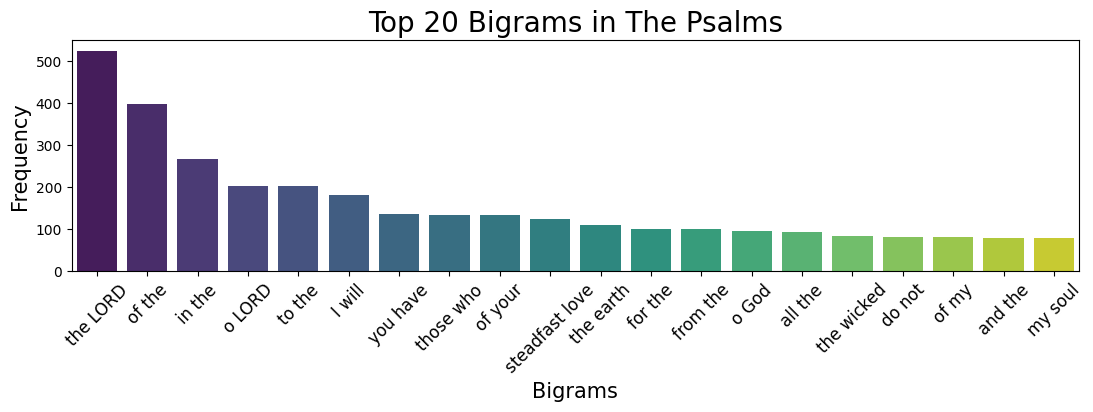

In [389]:
plot_bigrams(bigrams_psalms, "Top 20 Bigrams in The Psalms", top_n=20)

C:\Users\natec\AppData\Local\Temp\ipykernel_14472\484720296.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bigrams), y=list(counts), palette="viridis")


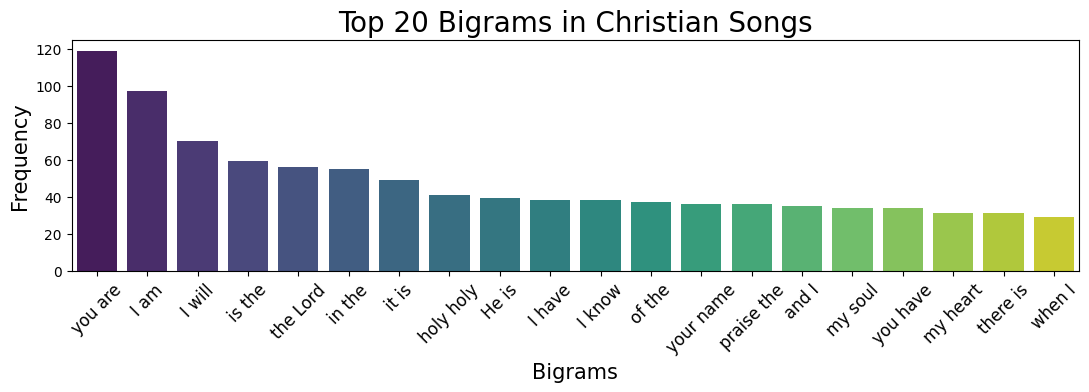

In [390]:
plot_bigrams(bigrams_songs, "Top 20 Bigrams in Christian Songs", top_n=20)

C:\Users\natec\AppData\Local\Temp\ipykernel_14472\484720296.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bigrams), y=list(counts), palette="viridis")


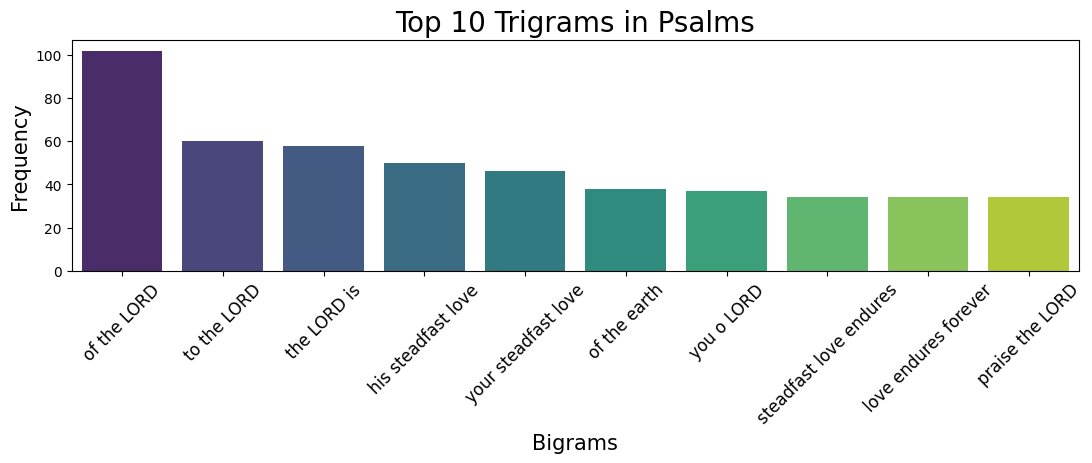

In [391]:
plot_bigrams(trigrams_psalms, "Top 10 Trigrams in Psalms", top_n=10)

C:\Users\natec\AppData\Local\Temp\ipykernel_14472\484720296.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bigrams), y=list(counts), palette="viridis")


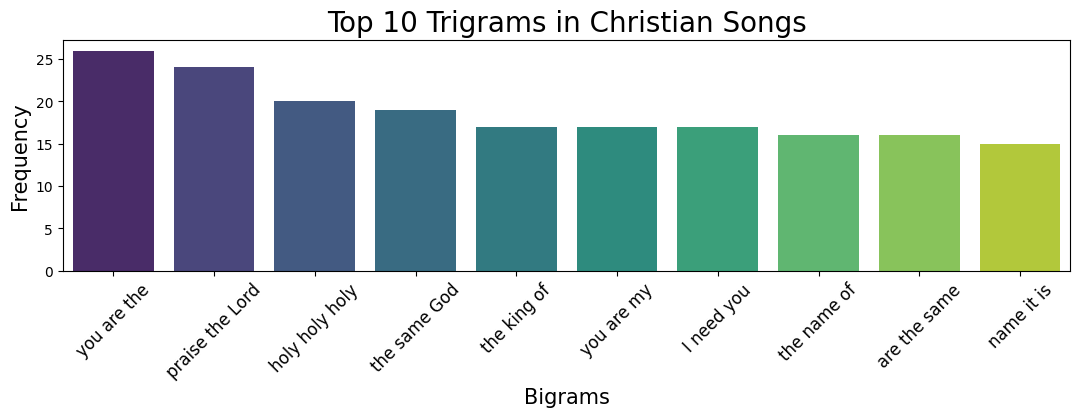

In [392]:
plot_bigrams(trigrams_songs, "Top 10 Trigrams in Christian Songs", top_n=10)

In [393]:
def get_ngram_frequencies_filtered(word_list, n=2, low_impact_words=set()):
    """
    Generate n-gram frequencies from a word list,
    filtering out n-grams that contain more than one low-impact word.
    """
    # Generate all n-grams
    ngram_list = list(ngrams(word_list, n))
    
    # Filter the n-grams: allow n-grams that have at most one low-impact word.
    filtered_ngrams = []
    for gram in ngram_list:
        count_low = sum(1 for word in gram if word in low_impact_words)
        if count_low <= 1:
            filtered_ngrams.append(gram)
    
    return Counter(filtered_ngrams)


In [394]:
bigrams_psalms_filtered = get_ngram_frequencies_filtered(all_psalms_word_list4, n=2, low_impact_words=low_impact_words)
print(bigrams_psalms_filtered.most_common(20))


[(('steadfast', 'love'), 123), (('the', 'earth'), 110), (('the', 'wicked'), 82), (('my', 'soul'), 78), (('like', 'a'), 61), (('my', 'heart'), 51), (('his', 'steadfast'), 50), (('your', 'name'), 49), (('the', 'nations'), 48), (('your', 'steadfast'), 46), (('the', 'heavens'), 44), (('according', 'to'), 43), (('the', 'righteous'), 42), (('endures', 'forever'), 42), (('the', 'day'), 39), (('praise', 'the'), 39), (('right', 'hand'), 39), (('the', 'land'), 38), (('the', 'peoples'), 37), (('give', 'thanks'), 34)]


In [395]:
bigrams_songs_filtered = get_ngram_frequencies_filtered(all_songs_word_list4, n=2, low_impact_words=low_impact_words)
print(bigrams_songs_filtered.most_common(20))   

[(('holy', 'holy'), 41), (('I', 'know'), 38), (('your', 'name'), 36), (('praise', 'the'), 36), (('my', 'soul'), 34), (('my', 'heart'), 31), (('the', 'king'), 27), (('gon', 'na'), 27), (('I', '’m'), 26), (('worthy', 'is'), 26), (('the', 'lamb'), 26), (('wo', 'not'), 25), (('the', 'same'), 24), (('my', 'life'), 21), (('the', 'grave'), 21), (('will', 'sing'), 20), (('king', 'of'), 19), (('the', 'name'), 19), (('great', 'is'), 19), (('how', 'great'), 19)]


# Word Clouds

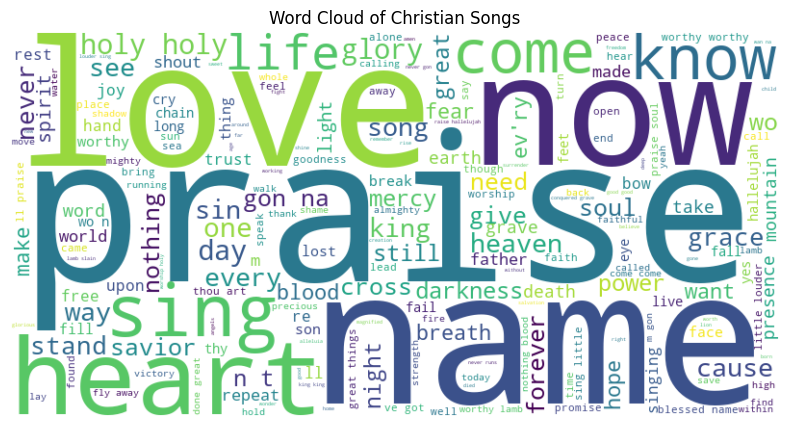

In [396]:
from wordcloud import WordCloud

# Combine all words from all songs into a single list

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_songs_word_list3))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Christian Songs")
plt.show()

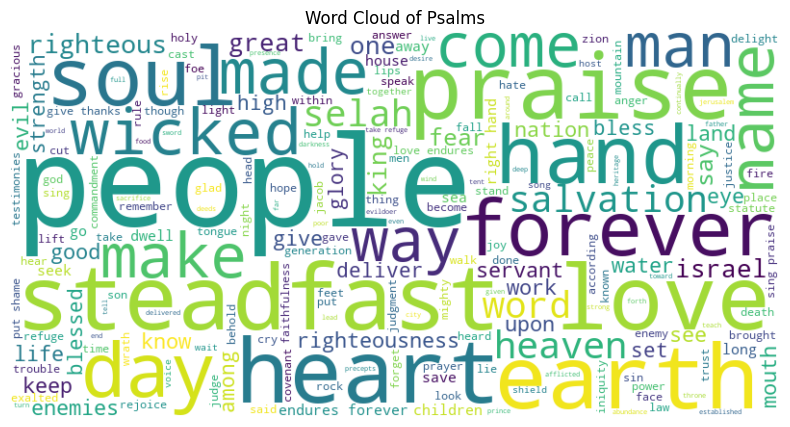

In [397]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_psalms_word_list3))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Psalms")
plt.show()